## Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import warnings
warnings.filterwarnings('ignore')

 Rest of the libraries will be important according to the requirement

In [2]:
#loading MNIST data using keras
from keras.datasets import mnist
np.random.seed(seed=42)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
#shape of each array:

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Overview of the data:
- X_train and Y_train are split into 60,000 rows and 60,000 labels respectively.
- X_test and Y_test are split into 10,000 rows and 10,000 labels respectively.
- Each row of X_train or X_test can be thought of as a 28x28 matrix where, each element of this matrix has integer values between 0-255, representing the greyscale values

Lets normalize the pixel values to squash it to the range [-1,1]. This can be done as follows:

In [4]:
X_train = ((X_train/255) - 0.5)*2
X_test = ((X_test/255) - 0.5)*2

Visualizing the first coccuring 0-9 digits. Each image represents the 28x28 pixels greyscale image:

In [5]:
X_train.shape

(60000, 28, 28)

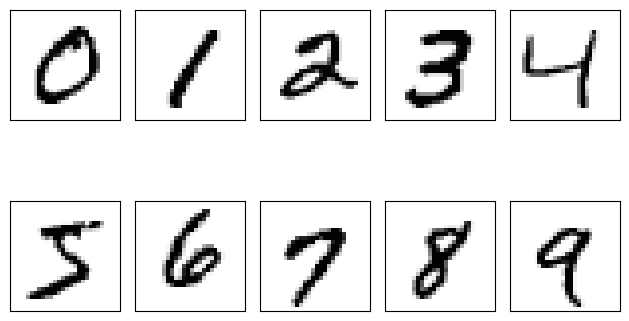

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax=ax.flatten()
for i in range(0,10):
    image = X_train[Y_train==i][0].reshape(28,28)
    ax[i].imshow(image, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

We can also visualize the various styles of the given digit. Plotting the first 30 occurences of digit 5:

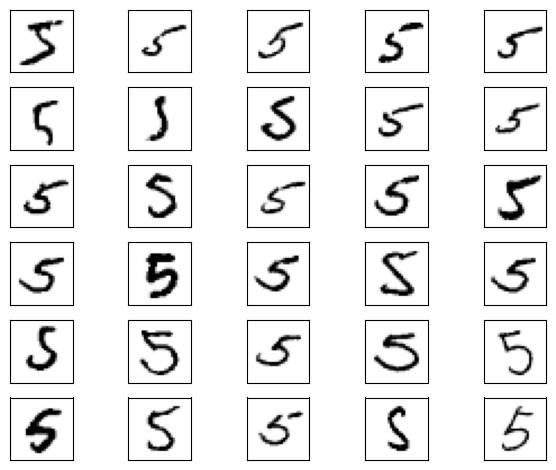

In [7]:
fig, ax = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True)
ax=ax.flatten()
for i in range(0,30):
    image = X_train[Y_train==5][i]
    ax[i].imshow(image, cmap='Greys')
ax[i].set_xticks([])
ax[i].set_yticks([])
plt.tight_layout()
plt.show()

We can say that, some of the images are hard even for humans to interpret. But fear not, our neural network isn't backing down!

Do we really need to contruct a CNN to get the best results with MNIST dataset? I will build a simple Multilayer Perceptron and walkthrough how it performs.

Our input vector is 3 dimensional. To feed the input to our Preceptron, we will reshape the input vector into a column vector:

In [8]:
num_pixels = X_train.shape[1] * X_train.shape[2]  #this will correspond to 784 pixels. each pixel value will be fed to each neuron.
X_train=X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

Y_train and Y_test are labels. Since our task is a multiclass classification task, we will perform one-hot encoding to the labels:

In [9]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_labels = Y_train.shape[1]

### Defining the model:

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# define baseline model
def SimpleMLP():
    
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(num_labels, kernel_initializer= 'normal' , activation= 'softmax' ))
# Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

### Building the model:

In [12]:
# build the model
model = SimpleMLP()
# Fit the model
model.fit(X_train, Y_train, epochs=20, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Model Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
300/300 - 5s - loss: 0.3619 - accuracy: 0.8966 - 5s/epoch - 16ms/step
Epoch 2/20
300/300 - 1s - loss: 0.1456 - accuracy: 0.9578 - 758ms/epoch - 3ms/step
Epoch 3/20
300/300 - 1s - loss: 0.1001 - accuracy: 0.9702 - 740ms/epoch - 2ms/step
Epoch 4/20
300/300 - 1s - loss: 0.0802 - accuracy: 0.9757 - 712ms/epoch - 2ms/step
Epoch 5/20
300/300 - 1s - loss: 0.0663 - accuracy: 0.9799 - 724ms/epoch - 2ms/step
Epoch 6/20
300/300 - 1s - loss: 0.0545 - accuracy: 0.9831 - 739ms/epoch - 2ms/step
Epoch 7/20
300/300 - 1s - loss: 0.0458 - accuracy: 0.9857 - 749ms/epoch - 2ms/step
Epoch 8/20
300/300 - 1s - loss: 0.0404 - accuracy: 0.9873 - 684ms/epoch - 2ms/step
Epoch 9/20
300/300 - 1s - loss: 0.0363 - accuracy: 0.9887 - 737ms/epoch - 2ms/step
Epoch 10/20
300/300 - 1s - loss: 0.0328 - accuracy: 0.9896 - 739ms/epoch - 2ms/step
Epoch 11/20
300/300 - 1s - loss: 0.0281 - accuracy: 0.9910 - 741ms/epoch - 2ms/step
Epoch 12/20
300/300 - 1s - loss: 0.0245 - accuracy: 0.9921 - 758ms/epoch - 3ms/step
Epo